# Problem Statement
# Analysing German credit card dataset to classify the customer

# Notes
- DM stands for Deutsche Mark, the unit of currency in Germany.
- Owns_telephone: German phone rates are very high, so fewer people own telephones.
- Foreign_worker: There are millions of foreign worker working in Germany
- 20 attributes used in judging a loan applicant. The goal is the classify the applicant into one of two categories, good or bad, which is the last attribute
- This dataset is typical of data used in data mining: we have 1000 records.

In [314]:
# Loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.display import display_html

In [217]:
# importing the dataset
DF = pd.read_csv('german_credit_data_dataset.csv')
DF.head(10)
# Head function will give the first 5 rows with all the column values

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
5,A14,36,A32,A46,9055.0,A65,A73,2.0,A93,A101,...,A124,35.0,A143,A153,1.0,A172,2,A192,A201,1
6,A14,24,A32,A42,2835.0,A63,A75,3.0,A93,A101,...,A122,53.0,A143,A152,1.0,A173,1,A191,A201,1
7,A12,36,A32,A41,6948.0,A61,A73,2.0,A93,A101,...,A123,35.0,A143,A151,1.0,A174,1,A192,A201,1
8,A14,12,A32,A43,3059.0,A64,A74,2.0,A91,A101,...,A121,61.0,A143,A152,1.0,A172,1,A191,A201,1
9,A12,30,A34,A40,5234.0,A61,A71,4.0,A94,A101,...,A123,28.0,A143,A152,2.0,A174,1,A191,A201,2


In [7]:
DF.shape

(1000, 21)

- Data set contains 1000 rows and 21 columns

In [180]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   personal                 1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

- We dont see any null values
- 3 data types (Object, Float and Integers) are present
- Categorical variables : 13   
- Numerical variables (Float and  Integer) :8

Target variable:
- customer_type - Integer

Independent Categorical Variables
- checking_account_status  
- credit_history
- purpose
- savings
- present_employment
- personal
- other_debtors
- property
- other_installment_plans
- housing
- job
- telephone
- foreign_worker

Independent Numerical Variables
- duration
- credit_amount
- installment_rate
- present_residence
- age
- existing_credits
- dependents

In [ ]:
# Missing value %
# Alternate way to find the missing value % column wise
# Here we dont have missing values
# DF.isna().mean().round(4)*100

In [41]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
customer_type,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


Observations :

Duration :
- Customers Average duration is around 20 months
- But mean > median (20>18) which states that data is skewed to right, Most of the data are bunched towards left (less duration)
- Since data is skewed,std will not give much information
- min duration month starts from 4 and max is 72
- Half of the customers duration month is around 18 months
- Major difference between max and q3 which needs to be investigated

Credit_amount :
- Customers average credit amount is around 3271 which very large than median (2319)
- Right skewed data
- Mean is larger due to outliers needs to investiage on that (Max val is 18424)

Age :
- Average customer age is 35
- Due to some ouliers mean is greater than median
- 75 yrs age customers are present, we will investiage on that
- Most of the customers are belongs to 30 - 35 years old


- If we dig deeper, we might find installment_rate, present_residence,existing_credits,dependents which are numerical may actually be categorical.

# Univariate Anlaysis

# Target Feature : Customer Type

- Key : 1 = Good customer 2 = Bad customer

1    700
2    300
Name: customer_type, dtype: int64

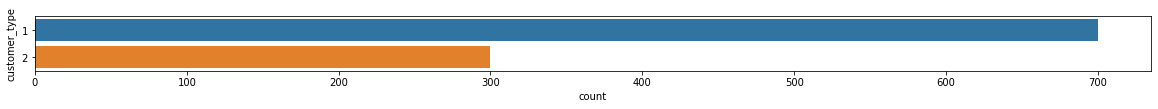

In [27]:
# How many customers classified as Good and Bad
fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'customer_type', data=DF)
DF.customer_type.value_counts()

Observations:
- Good customers are more in number 700
- 30% of customers are classified as bad
- Imbalanced dataset

# Numerical Features

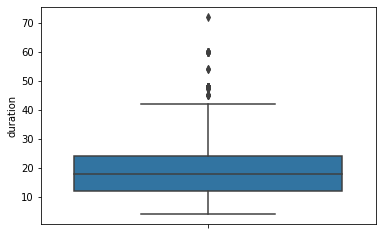

In [53]:
# Feature : Duration
sns.boxplot(y = DF['duration'])

- Duration data is right skewed with outliers
- Most values are centred around 12 - 24 months
- Many ouliers are after 42 months, we need to handle it

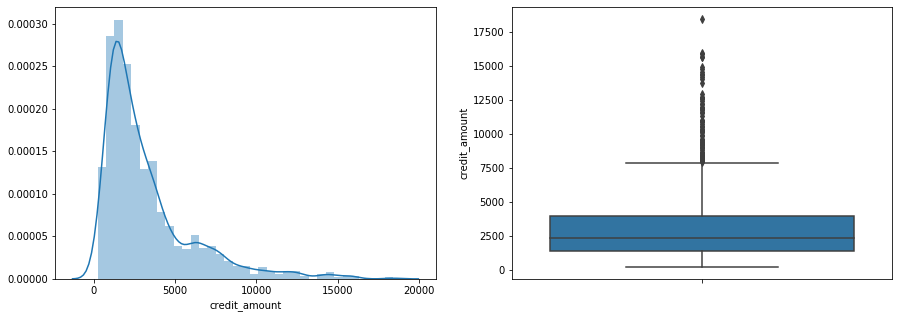

In [89]:
# Feature : credit_amount
f,axes = plt.subplots(1,2,figsize=(15,5))

sns.distplot(DF.credit_amount,ax = axes[0])
sns.boxplot(y = DF.credit_amount, ax = axes[1])

- Credit amount data is right skewed with many outliers after 7500 euros
- most of the data are bunched left between 2000 and 3500

dtype('int64')

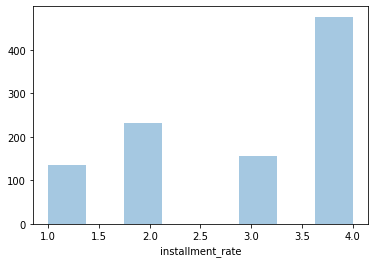

In [184]:
# Feature : installment_rate
DF['installment_rate'] = DF['installment_rate'].astype('int64')
sns.distplot(DF.installment_rate,kde=False)

- As we expected, Installment rate falls into categorical type.
- Most of the customers falls into Installment rate 4% 

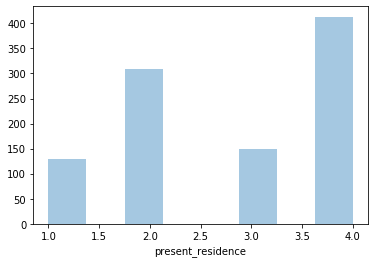

In [189]:
# Feature: present_residence in years
# 1<…<=2 years,2<…<=3 years,3:>4years
DF['present_residence'] = DF['present_residence'].astype('int64')
sns.distplot(DF.present_residence,kde=False)

- Customers who are staying in the same residence more than 4 years are high in numbers
- This feature also falls in categorical

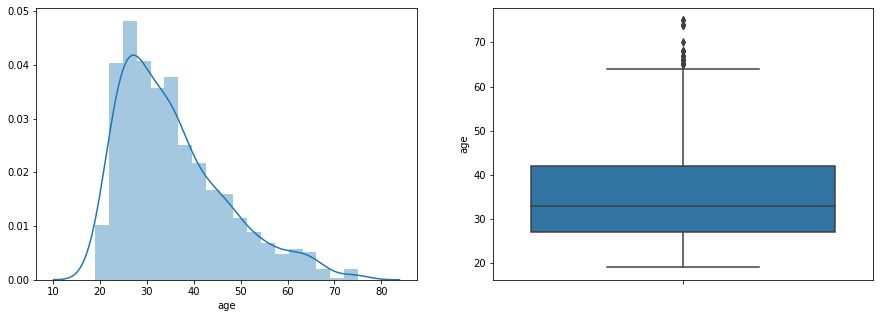

In [94]:
# Feature : Age
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(DF.age,ax = axes[0])
sns.boxplot(y = DF.age)

- Age is slightly skewed to right
- most of the customers falls in the range of 27 to 42 years
- Outliers after 65 years

1    633
2    333
3     28
4      6
Name: existing_credits, dtype: int64

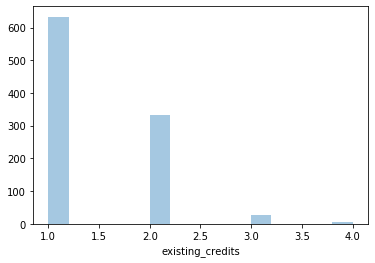

In [195]:
# Feature : existing_credits ( Already existing credits at this bank)
DF['existing_credits'] = DF['existing_credits'].astype('int64')
sns.distplot(DF.existing_credits, kde=False)
DF.existing_credits.value_counts()

- This numerical feature can be considered as categorical
- Most of the customers having only one credit at this bank
- Some customers are having 2 credits also
- very minimal customers are having more than 3 credits, We will check how they got more than 3 credits at same bank in which criteria

1    845
2    155
Name: dependents, dtype: int64

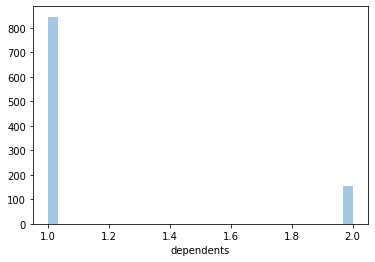

In [107]:
# Features : Dependents
sns.distplot(DF.dependents, kde= False)
DF.dependents.value_counts()

- Needs to be considered as categorical
- Customers having 1 dependent are very high

# Categorical Features

A14    394
A11    274
A12    269
A13     63
Name: checking_account_status, dtype: int64

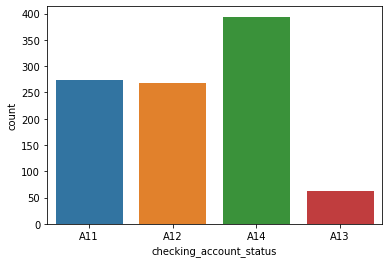

In [140]:
# Feature : checking_account_status
# A11: < 0 DM
# A12: 0 <= x < 200 DM
# A13 : >= 200 DM / salary assignments for at least 1 year
# A14 : no checking account

sns.countplot(DF.checking_account_status)
DF.checking_account_status.value_counts()

- Customers with no checking account is high in number
- We can label the values with 0 1 2 3 to understand easily

A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64

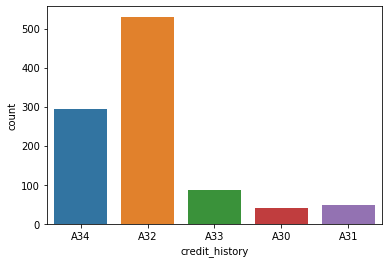

In [112]:
# Feature : credit_history
# A30 : no credits taken/ all credits paid back duly
# A31 : all credits at this bank paid back duly
# A32 : existing credits paid back duly till now
# A33 : delay in paying off in the past
# A34 : critical account/ other credits existing (not at this bank)
sns.countplot(DF.credit_history)
DF.credit_history.value_counts()

- Customer who are paying the credits duly till now are high in number (Customers classified as good are 70% high)
- Customers having credit in banks and critical accounts are second highest (around 300)
- Credit history is the most contributing feature as of now
- We can re label this feature values

A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: purpose, dtype: int64

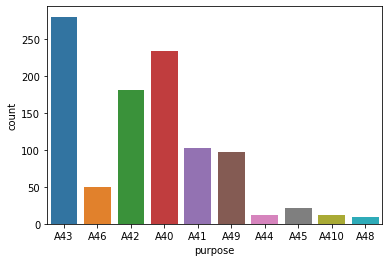

In [115]:
# Feature : purpose
# A40 : car (new)
# A41 : car (used)
# A42 : furniture/equipment
# A43 : radio/television
# A44 : domestic appliances
# A45 : repairs
# A46 : education
# A47 : (vacation - does not exist?)
# A48 : retraining
# A49 : business
# A410 : others
sns.countplot(DF.purpose)
DF.purpose.value_counts()

- Credits for radio/television car and furnitures acredits are high in number
- we need to relabel this feature

A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings, dtype: int64

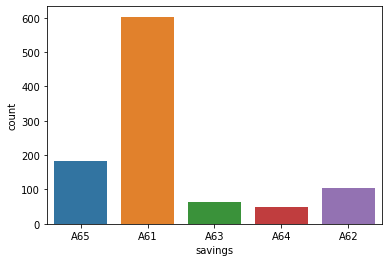

In [119]:
# Feature : Savings (Balane in savings account)
# A61 : < 100 DM, 
# A62 : 100 <= x < 500 DM
# A63 : 500 <= x < 1000 DM
# A64 : >= 1000 DM
# A65 : unknown/ no savings account

sns.countplot(DF.savings)
DF.savings.value_counts()

- Most of the customers having < 100 DM in savings account
- Some customers are not having savings account

A73    339
A75    253
A74    174
A72    172
A71     62
Name: present_employment, dtype: int64

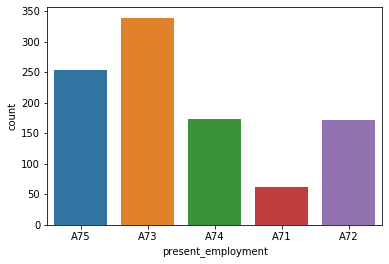

In [121]:
# Feature : Present Employment
# A71 : unemployed
# A72 : < 1 year
# A73 : 1 <= x < 4 years
# A74 : 4 <= x < 7 years
# A75 : .. >= 7 years
sns.countplot(DF.present_employment)
DF.present_employment.value_counts()

- Customers having min 4 years of employment experience has high in numbers
- More than 7 years customers also moderately high 

A93    548
A92    310
A94     92
A91     50
Name: personal, dtype: int64

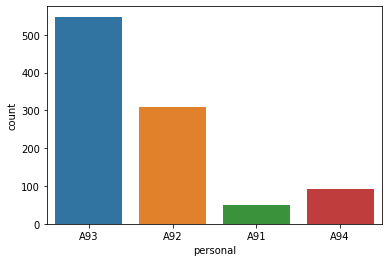

In [123]:
# Feature : Personal
# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single

sns.countplot(DF.personal)
DF.personal.value_counts()

- Most of the customers are male who are not married
- Divorced female customers are second in numbers

A101    907
A103     52
A102     41
Name: other_debtors, dtype: int64

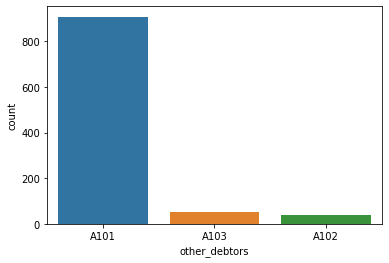

In [126]:
# Feature : Other Debtors
# A101 : none
# A102 : co-applicant
# A103 : guarantor

sns.countplot(DF.other_debtors)
DF.other_debtors.value_counts()

- Customers who dont have co-applicant and guarantor are more

A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64

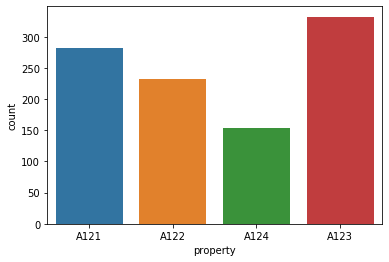

In [128]:
# Feature : Property
# A121 : real estate
# A122 : if not A121 : building society savings agreement/ life insurance
# A123 : if not A121/A122 : car or other, not in attribute 6
# A124 : unknown / no property

sns.countplot(DF.property)
DF.property.value_counts()

- Customers tends to buy car, furniture, televisions are more

A143    814
A141    139
A142     47
Name: other_installment_plans, dtype: int64

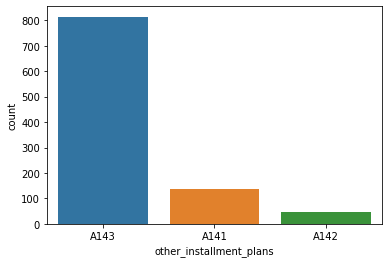

In [130]:
# Feature : Other Installments plans
# A141 : bank
# A142 : stores
# A143 : none

sns.countplot(DF.other_installment_plans)
DF.other_installment_plans.value_counts()

- Most of the customers dont have other installments 

A152    713
A151    179
A153    108
Name: housing, dtype: int64

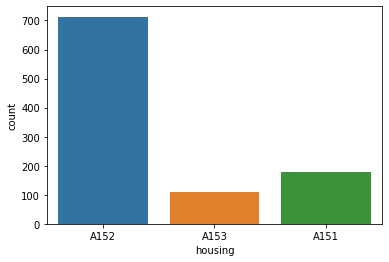

In [132]:
# Features : Housing
# A151 : rent
# A152 : own
# A153 : for free

sns.countplot(DF.housing)
DF.housing.value_counts()

- Most of the customers are owning the house
- It states that real estate/land purchase credits are very minimal in this dataset
- May be the bank gives the customers who owns propert if they quote more credit

A173    630
A172    200
A174    148
A171     22
Name: job, dtype: int64

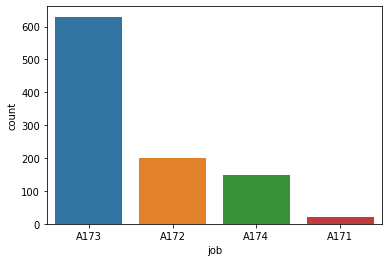

In [134]:
# Feature : Job
# A171 : unemployed/ unskilled - non-resident
# A172 : unskilled - resident
# A173 : skilled employee / official
# A174 : management/ self-employed/highly qualified employee/ officer

sns.countplot(DF.job)
DF.job.value_counts()

- We can classify the skilled employment customers who are high numbers
    - May be they are resident
    - They are not in management or highly qulified officers whose salaries are high

A191    596
A192    404
Name: telephone, dtype: int64

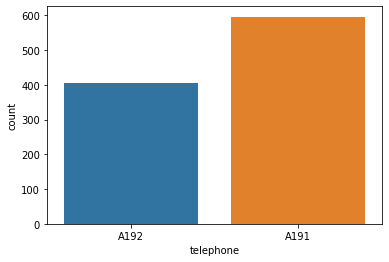

In [136]:
# Feature : Telephone
# A191 : none
# A192 : yes, registered under the customers name

sns.countplot(DF.telephone)
DF.telephone.value_counts()

- Most of the customers dont have telephone

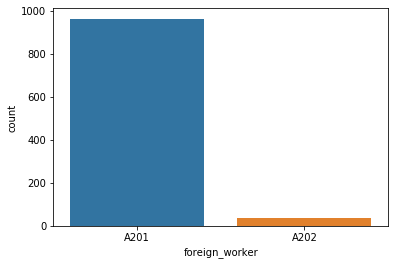

In [138]:
# Feature : Foreign worker
# A201 : yes
# A202 : no

sns.countplot(DF.foreign_worker)

- Foreign working customers are more in numbers

# Univariate conclusion

- Most of the male customers who are single, applied credit than the female customers in th purpose of purchasing Radio/TV or new cars.
- 60% of the customers are having good credit history who pays their credits duly
- Most of the customers are foreign workers as a skilled employee having around 4 years of employment experience
- Customers having own house and staying more than 4 years on the same location are high
- More than 70% of customers dont have other installment plans except the existing credits (Only one) at this bank 
- Most credit amount requested by the customers are concentrated around 2000 - 3500 with the duration between 12 -24 months majorly.

# Bi - Variate Analysis

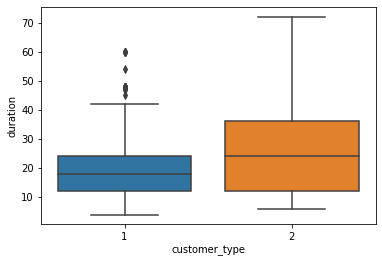

In [220]:
# Continuos and Continous
# duration and Customer type

sns.boxplot(x = 'customer_type', y ='duration', data =DF)

In [ ]:
# Customer type 1 : Good customers
- Customer type 1 minimum duration starts around 4 months and customer type 2 starts around 8
- Q1 (lowest 25%) of customers falls b/w 4 - 12 onths in customer type1 and 8 - 12 months for custmer type 2
- Median value is high for bad customers around 24 months and 18 for good customers
- Good custmers data are more consistent when compared to bad
- Maximum value is very for bad customers
- Some outliers are present in good customers

Note : More variability, inconsistency and very high duration months may be the reason to classify a customer as bad

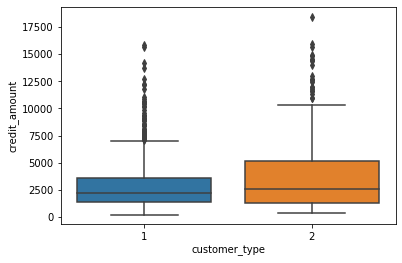

In [224]:
# Credit Amount
sns.boxplot(x = DF['customer_type'], y = DF['credit_amount'], data = DF)

- Both good and bad customers are having so many outliers
- Good customers credit amount are more consistent around 2000 - 2700 than bad customer who having high variability
- This states that bad customers are quoted more credit amount

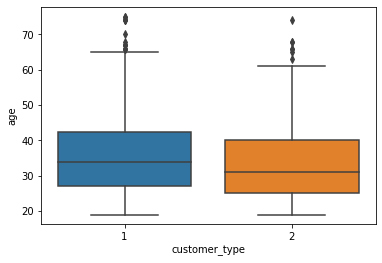

In [231]:
# Age
sns.boxplot(x = DF['customer_type'], y = DF['age'], data =DF)

- Both customers having outliers in age
- Both customers follows same minimum age creiteria ( This may be due to minimum age eligibility to apply credit)
- 50% of bad risk customers are aged below 32 years
    - young age customers may get low income
    - May be credit amount and duration are high
- 50% of good risk customers are above 35 years.
    - Middle age customers who may get good income since the employment experience increases
- But how about the customers above 65 years are classified as good ? we need to investiage on employment , property and more.

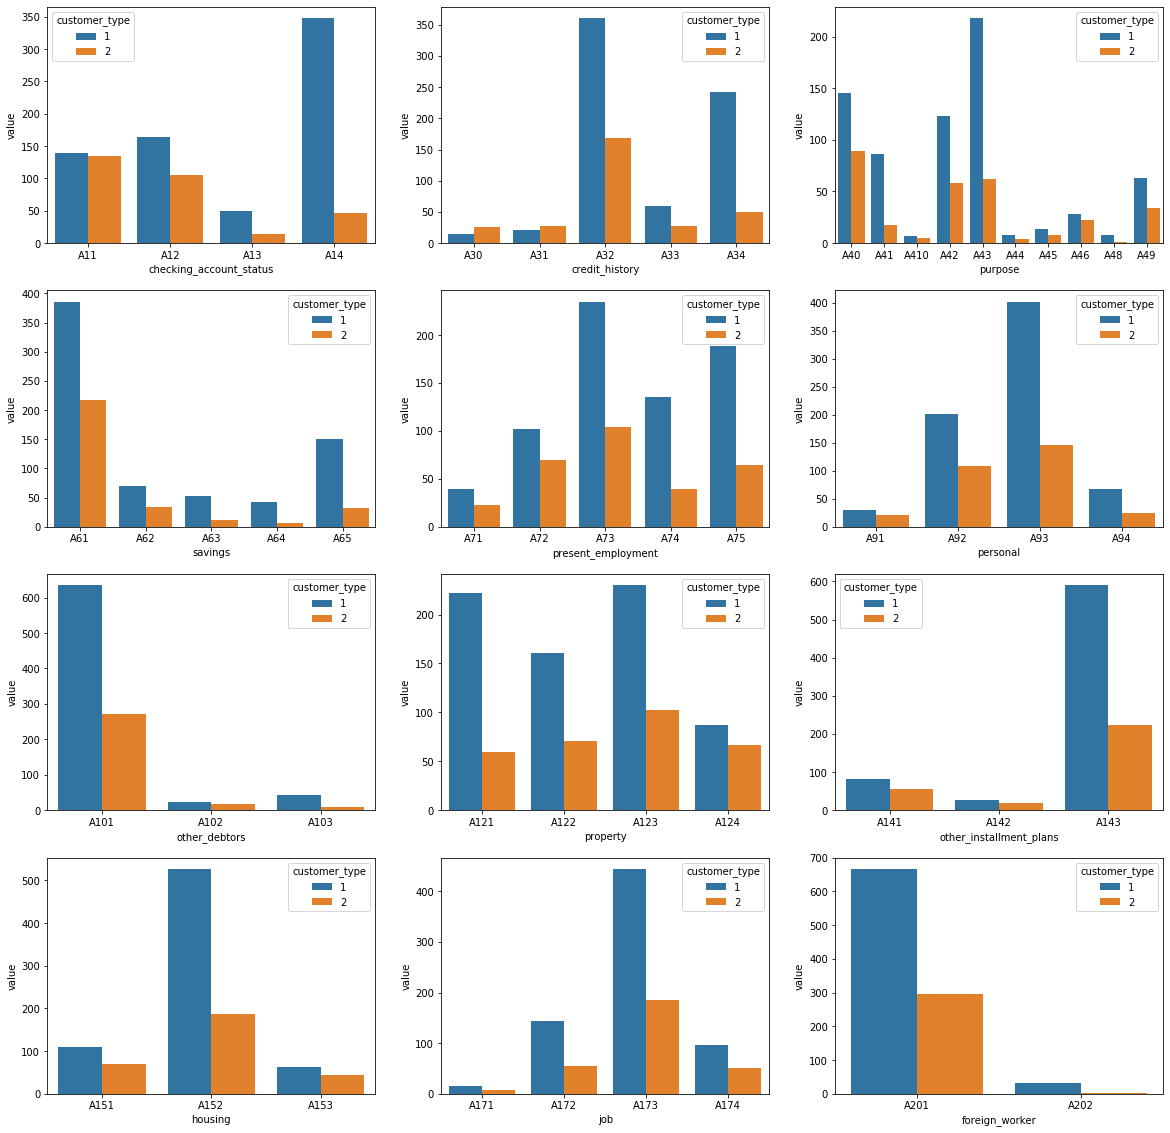

In [327]:
fig,axes = plt.subplots(4,3,figsize=(20,20))

###########################################################################################################################
Customer_AccountStatus = pd.crosstab(index = DF.checking_account_status,columns=DF.customer_type)
stacked = Customer_AccountStatus.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.checking_account_status, y=stacked.value, hue=stacked.customer_type, ax = axes[0,0])

############################################################################################################################
customer_credithistory = pd.crosstab(index = DF.credit_history, columns=DF.customer_type)
stacked = customer_credithistory.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.credit_history,y=stacked.value,hue=stacked.customer_type,ax = axes[0,1])

############################################################################################################################
customer_purpose = pd.crosstab(index = DF.purpose, columns=DF.customer_type)
stacked = customer_purpose.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.purpose,y=stacked.value,hue=stacked.customer_type,ax = axes[0,2])

############################################################################################################################
customer_savings = pd.crosstab(index = DF.savings, columns=DF.customer_type)
stacked = customer_savings.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.savings,y=stacked.value,hue=stacked.customer_type, ax = axes[1,0])

############################################################################################################################
customer_presentemployment = pd.crosstab(index = DF.present_employment, columns=DF.customer_type)
stacked = customer_presentemployment.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.present_employment,y=stacked.value,hue=stacked.customer_type,ax = axes[1,1])

############################################################################################################################
customer_personal = pd.crosstab(index = DF.personal, columns=DF.customer_type)
stacked = customer_personal.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.personal,y=stacked.value,hue=stacked.customer_type, ax = axes[1,2])

###########################################################################################################################
customer_otherdebtors = pd.crosstab(index = DF.other_debtors, columns=DF.customer_type)
stacked = customer_otherdebtors.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.other_debtors,y=stacked.value,hue=stacked.customer_type, ax = axes[2,0])

###########################################################################################################################
customer_property = pd.crosstab(index = DF.property, columns=DF.customer_type)
stacked = customer_property.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.property,y=stacked.value,hue=stacked.customer_type, ax = axes[2,1])

##########################################################################################################################
customer_otherinstallmentplans = pd.crosstab(index = DF.other_installment_plans, columns=DF.customer_type)
stacked = customer_otherinstallmentplans.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.other_installment_plans,y=stacked.value,hue=stacked.customer_type, ax = axes[2,2])

##########################################################################################################################
customer_housing = pd.crosstab(index = DF.housing, columns=DF.customer_type)
stacked = customer_housing.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.housing,y=stacked.value,hue=stacked.customer_type, ax = axes[3,0])

##########################################################################################################################
customer_job = pd.crosstab(index = DF.job, columns=DF.customer_type)
stacked = customer_job.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.job,y=stacked.value,hue=stacked.customer_type, ax = axes[3,1])

#########################################################################################################################
customer_foreignworker = pd.crosstab(index = DF.foreign_worker, columns=DF.customer_type)
stacked = customer_foreignworker.stack().reset_index().rename(columns = {0:'value'})
sns.barplot(x=stacked.foreign_worker,y=stacked.value,hue=stacked.customer_type, ax = axes[3,2])


#display_side_by_side(Customer_AccountStatus, customer_credithistory,customer_savings,customer_presentemployment,customer_personal,\
#                     customer_purpose,customer_otherdebtors,customer_property )